# Principal Component Analysis

by Rene Zhang and 

Part of the Quantopian Lecture Series:
* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [https://github.com/quantopian/research_public](https://github.com/quantopian/research_public)


Reference:
- Datta, B.N., 2010. *Numerical linear algebra and applications*. Siam.
- Qian, E.E., Hua, R.H. and Sorensen, E.H., 2007. *Quantitative equity portfolio management: modern techniques and applications*. CRC Press.

Many practical-life applications involve large-scale data, such as image processing, bioinformatics, and quantitative finance. Both the size and complexities of the data could make the computations required for analysis practically infeasible. Principal Component Analysis (PCA) is a classical method for dimension reduction. It uses first several principal components, that explain most of the variation of a $m \times n$ data matrix $\mathbf{X}$, to deciribe the data matrix $\mathbf{X}$ economically.   

### Math:

In [73]:
from numpy import linalg as LA
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

We will introduce PCA with an image processing example. A grayscale digital image can be represented by a matrix, whose $(i,j)^{th}$ entry corresponds to the measurement of gray
scale on $(i,j)^{th}$ pixel. The following gray-scale image has $768 \times 1024$ pixels. We store it in a matrix $\mathbf{X}$. The number of rows of the  $\mathbf{X}$ is $768$, and the number of columns of $\mathbf{X}$ is $1024$.

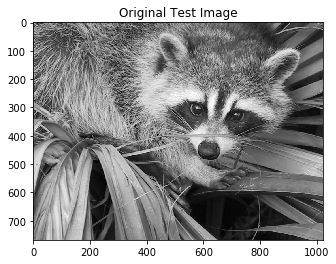

In [121]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original Test Image')
plt.show()

In [123]:
X.shape

(768, 1024)

In [122]:
m = X.shape[0] # num of rows
n = X.shape[1] # num of columns

Set each row as a variable, with observations in the columns. Denote the covariance matrix of $\mathbf{X}$ as $\mathbf{C}$, where the size of $\mathbf{C}$ is $m \times m$. $\mathbf{C}$ is a matrix whose $(i,j)^{th}$ entry is the covariance between the $i^{th}$ row and $j^{th}$ row of the matrix $\mathbf{X}$.

In [124]:
X = np.asarray(X, dtype=np.float64)
#C = np.cov(X, rowvar=False) if each column is a variable. 
C = np.cov(X)

In [125]:
C.shape

(768, 768)

The principal component analysis would decompose the matrix $\mathbf{C}$ into 

$$\mathbf{C} = \mathbf{L}\mathbf{P}\mathbf{L}^{\top},$$

where $\mathbf{P}$ is a diagonal matrix $\mathbf{P}=\text{diag}(\lambda_1,\lambda_2,\dots,\lambda_m)$, with $\lambda_1 \geq \lambda_1 \geq \dots \lambda_m \geq 0$, being the eigenvalues of matrix $\mathbf{C}$. The matrix $\mathbf{L}$ is an orthogonal matrix, consisting the eigenvectors of matrix $\mathbf{C}$.

In [126]:
P, L = LA.eigh(C)

The function `LA.eigh` lists the eigenvalues from small to large in $P$. Let us change the order first, and make sure $\mathbf{L}\mathbf{P}\mathbf{L}^{\top}==\mathbf{C}$. 

In [127]:
P = P[::-1]
L = L[:,::-1]

In [128]:
(L.dot(np.diag(P)).dot(L.T).round(5) == C.round(5))

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

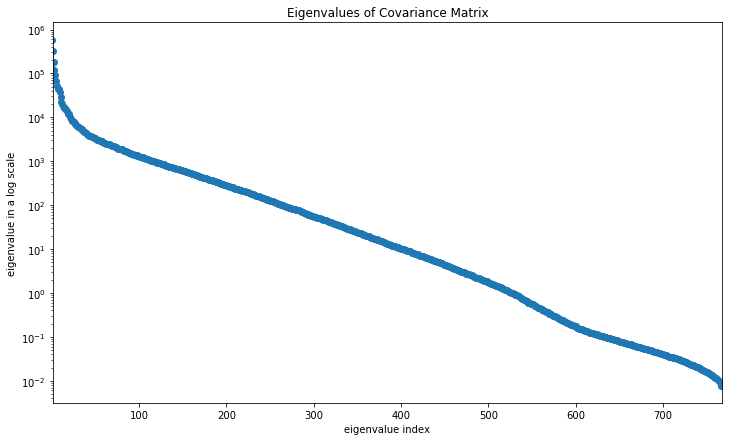

In [129]:
plt.figure(figsize=(12,7))
plt.semilogy(P, '-o')
plt.xlim([1, P.shape[0]])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue in a log scale')
plt.title('Eigenvalues of Covariance Matrix')
plt.show()

The $i^{th}$ **principal component** is given as $i^{th}$ row of $\mathbf{V}$, 

 $$\mathbf{V} =\mathbf{L}^{\top} \mathbf{X}.$$


In [118]:
#V = X.dot(L)
V = L.T.dot(X)

In [130]:
V.shape

(768, 1024)

The matrix $\mathbf{X}$ can be derived as

 $$\mathbf{L}\mathbf{L}^{\top} \mathbf{X}= \mathbf{L}^{\top}\mathbf{V}.$$

Since the eigenvectors $\mathbf{L}\mathbf{L}^{\top} \approx \mathbf{I}$ , 

$$\mathbf{X} \approx \mathbf{L}^{\top}\mathbf{V}.$$

Denote the approximated $\mathbf{X}$ as $\tilde{\mathbf{X}} = \mathbf{L}^{\top}\mathbf{V}$. Since we used all of the principal components, the $\tilde{\mathbf{X}}$ should be same as $\mathbf{X}$.

In [131]:
#X_tilde = np.asarray(V.dot(L.T),dtype=np.float64)
X_tilde =  np.asarray(L.dot(V),dtype=np.float64)

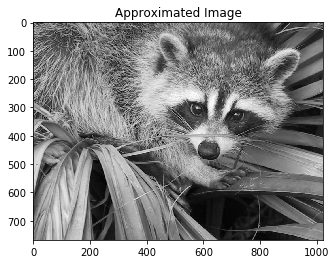

In [32]:
plt.imshow(np.asarray(X_tilde, dtype=np.uint8), cmap=plt.cm.gray)
plt.title('Approximated Image')
plt.show()

The proportion of total variance due to the $i^{th}$ principal component is given by the ration $\frac{\lambda_i}{\lambda_1 + \lambda_2 + \dots \lambda_m}.$ The sum of proportion of total variance should be $1$. As we defined, $\lambda_i$ is $i^{th}$ entry of $\mathbf{P}$, 
 $$\sum_{i}\frac{P_i}{\text{trace}(P)} = 1$$


In [33]:
(P/P.sum()).sum() 

1.0

In [67]:
plt.figure(figsize=(12,7))
plt.plot((P/P.sum()).cumsum(), '-o')
plt.title('Cumulative Sum of the Proportion of Total Variance')
plt.xlabel('index')
plt.ylabel('Proportion')
plt.show()

NameError: name 'P' is not defined

Denote the number of principal components to be used as $k$. Let $k$ be $50, 100, 200, 400$ as examples. Let us take a look at the corresponding approximated images.

In [136]:
X_tilde_15 = np.asarray(L[:,0:15].dot(V[0:15,:]),dtype='f')
X_tilde_50 =  np.asarray(L[:,0:50].dot(V[0:50,:]),dtype='f')
X_tilde_200 = np.asarray(L[:,0:200].dot(V[0:200,:]),dtype='f')
X_tilde_400 =np.asarray(L[:,0:400].dot(V[0:400,:]),dtype='f')

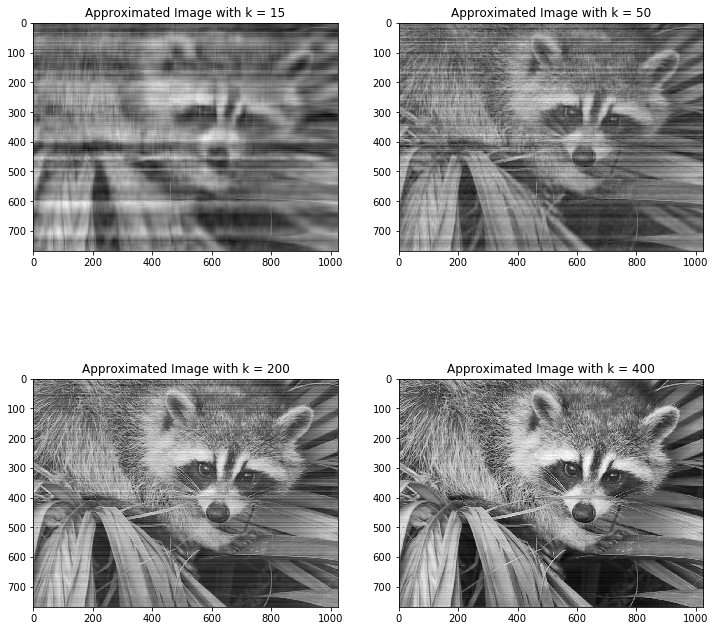

In [137]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
ax1.imshow(X_tilde_15, cmap=plt.cm.gray)
ax1.set(title='Approximated Image with k = 15')
ax2.imshow(X_tilde_50, cmap=plt.cm.gray)
ax2.set(title='Approximated Image with k = 50')
ax3.imshow(X_tilde_200, cmap=plt.cm.gray)
ax3.set(title='Approximated Image with k = 200')
ax4.imshow(X_tilde_400, cmap=plt.cm.gray)
ax4.set(title='Approximated Image with k = 400')
plt.show()

The number of variables in $X$ is $768$. When reducing the dimension to $k=400$, which is about half of $768$, the approximated image is close to the original one.

We went over the mathematics for better understand the idea of PCA. Luckly, the [sklearn package](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) has a function do the PCA. Next, let us show an example in quantitative finance using sklearn.

Construct a portfolio with 10 stocks, IBM, MSFT, FB, T, INTC, ABX, NEM, AU, AEM, GFI. 5 of them are technology related and 5 of them are gold mining companies. In this case, there are 10 variables, and each column is a variable.

In [68]:
symbol = ['IBM','MSFT', 'FB', 'T', 'INTC', 'ABX','NEM', 'AU', 'AEM', 'GFI']

start = "2015-09-01"
end = "2016-11-01"

portfolio_returns = get_pricing(symbol, start_date=start, end_date=end, fields="price").pct_change()[1:]

In [69]:
from sklearn.decomposition import PCA

X = np.asarray(portfolio_returns)
[m,n] = X.shape
print 'The number of timestamps is {}.'.format(m)
print 'The number of stocks is {}.'.format(n)

pca = PCA(n_components=2) # number of principle components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)

pca_components = pca.components_


The number of timestamps is 295.
The number of stocks is 10.


Set the number of principal components equal to 2, and plot the contribution of principal components.

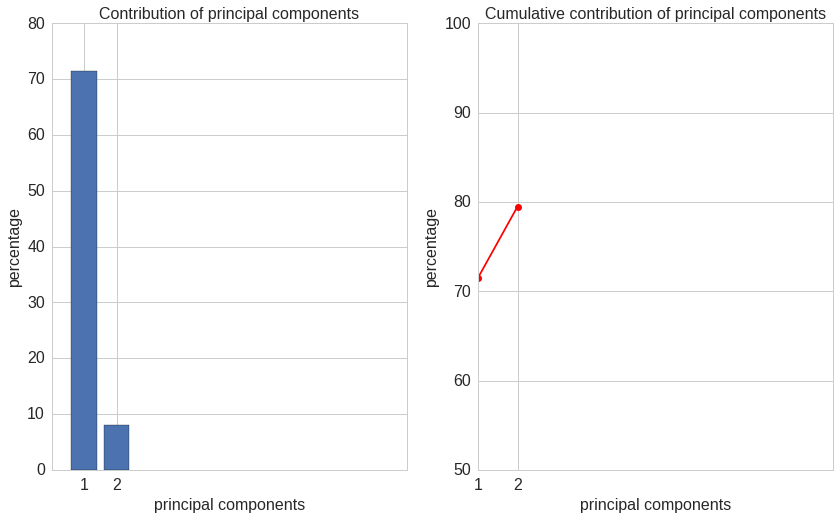

In [54]:
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0,n+1])

plt.subplot(1, 2, 2)
plt.plot(x,percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1,n])
plt.ylim([50,100])
plt.show()

In [55]:
import matplotlib.pyplot as plt

In [56]:
import pandas as pd
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=portfolio_returns.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2
2015-09-02 00:00:00+00:00,0.048380,0.039362
2015-09-03 00:00:00+00:00,0.018534,-0.025975
2015-09-04 00:00:00+00:00,0.009092,-0.040054
2015-09-08 00:00:00+00:00,-0.014046,0.044859
2015-09-09 00:00:00+00:00,0.071044,-0.029646


The factor returns here corresonds to the principal component matrix $\mathbf{V}$ in the image processing example. 

In [57]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=portfolio_returns.columns,
                                data = pca.components_).T

In [58]:
factor_exposures

,factor 1,factor 2
Equity(3766 [IBM]),-0.005298,0.264700
Equity(5061 [MSFT]),0.014303,0.269216
Equity(42950 [FB]),0.014244,0.286379
Equity(6653 [T]),-0.026329,0.131497
Equity(3951 [INTC]),0.006932,0.218811
Equity(64 [ABX]),-0.452318,0.300992
Equity(5261 [NEM]),-0.361989,0.403250
Equity(629 [AU]),-0.486184,-0.141009
Equity(154 [AEM]),-0.359356,0.307325
Equity(9936 [GFI]),-0.545605,-0.585436


The factor_exposure corresponds to the eigenvector matrix $\mathbf{L}$ in the image processing example.

In [59]:
labels = factor_exposures.index
data = factor_exposures.values

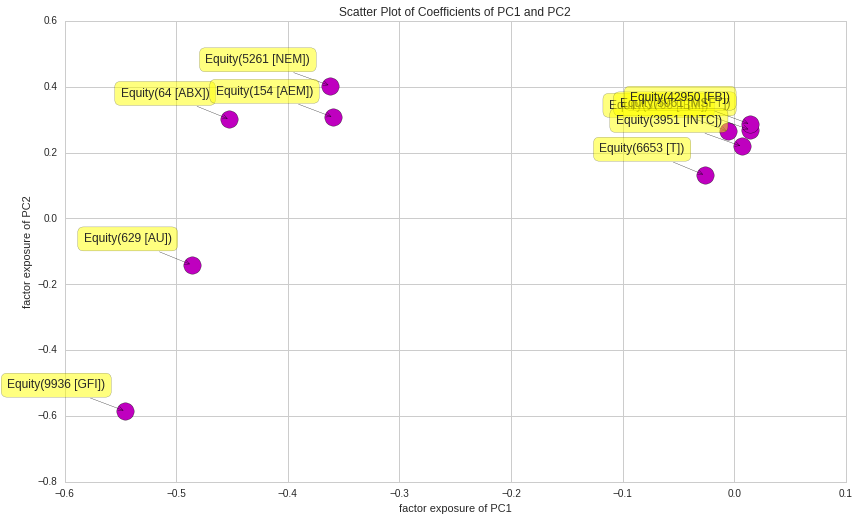

In [66]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [75]:
# connect with example 1
# X = np.asarray(X, dtype=np.float64)
# C = np.cov(X, rowvar=False)

# P, L = LA.eigh(C)
# P = P[::-1]
# L = L[:,::-1]

Notes: 

- One shortage of PCA is that it is not obvious to explain the meaning of the factor returns.
- 
The PCA is actually a singular value decomposition (SVD) problem.